Build a regression model.

In [1]:
## Get the data back from sql and import the needed packages
import sqlite3
import pandas as pd
import statsmodels.api as sm
conn = sqlite3.connect('mydatabase')
df = pd.read_sql('select * from bike_stations', conn)   ## there is only one table in the database, so no joins are needed

## df now contains the full data set with bike stations and venues, so we can process and model it now








EDA AND DATA CLEANING

In [5]:
print(df.isnull().sum())         ## checking for nulls - everything looks good

Latitude      0
Longitude     0
Free Bikes    0
yelp          0
foursquare    0
dtype: int64


In [6]:
print( df.duplicated().sum())  ## duplicate check also looks good

0


<Axes: xlabel='foursquare', ylabel='Count'>

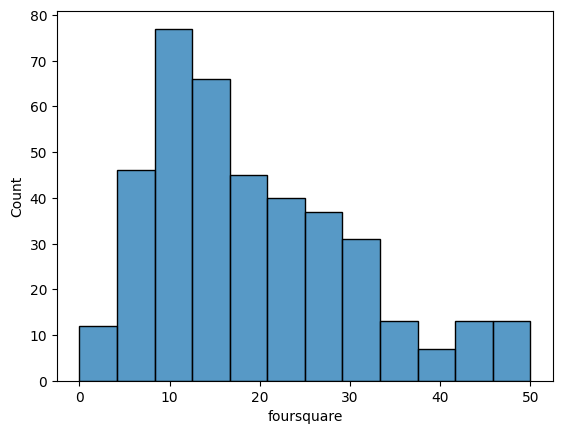

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df['foursquare'])  ## a quick check of the distribution reveals no crazy outliers

<Axes: xlabel='yelp', ylabel='Count'>

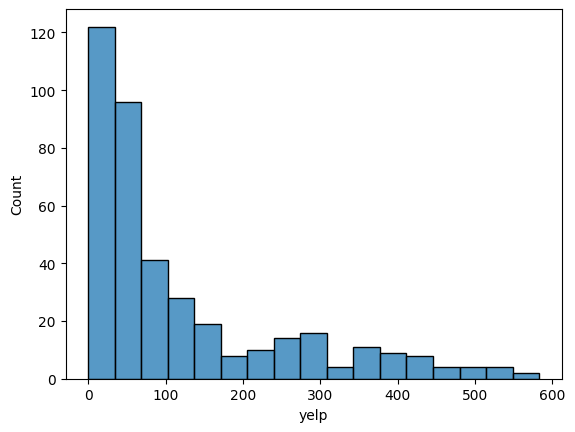

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df['yelp'])   ##  a quick check of the distribution reveals no crazy outliers

In [3]:
df.describe(include='all')
## 7.75 bikes are available on average at each station, this might be useful
## yelp has alot more results than foursquare

,Latitude,Longitude,Free Bikes,yelp,foursquare
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,43.663902,-79.393928,7.775000,119.277500,19.247500
std,0.026610,0.054536,6.588467,134.082795,11.226591
min,43.588077,-79.543207,0.000000,0.000000,0.000000
25%,43.649092,-79.423644,2.750000,30.000000,10.000000
50%,43.660285,-79.392820,6.000000,60.000000,16.000000
75%,43.671637,-79.369376,12.000000,157.500000,26.000000
max,43.780550,-79.130120,34.000000,583.000000,50.000000


In [7]:
df.corr()
## yelp and foursquare are correlated but this is obvious and doesnt help us
## The amount of bikes available is not significant in predicting anything

,Latitude,Longitude,Free Bikes,yelp,foursquare
Latitude,1.000000,0.428331,-0.281735,-0.234148,-0.231388
Longitude,0.428331,1.000000,0.046625,0.067628,-0.002248
Free Bikes,-0.281735,0.046625,1.000000,0.053689,0.041856
yelp,-0.234148,0.067628,0.053689,1.000000,0.782690
foursquare,-0.231388,-0.002248,0.041856,0.782690,1.000000


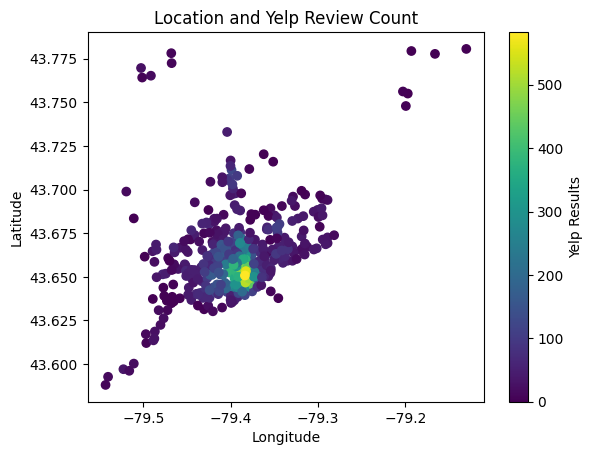

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.scatter(x=df['Longitude'],y=df["Latitude"], c = df['yelp'])

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location and Yelp Review Count')
plt.colorbar().set_label('Yelp Results')

## This chart shows that There is a pattern between location and number of businesses nearby, and we will use this for our model hypothesis


Model Building

In [12]:
x = df[['Free Bikes']]
y = df['yelp']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)


## Free Bikes has a P score of .284 so it is not statistically significant in predicting the amount of nearby businesses, confirming our thoughts from the correlation matrix

                            OLS Regression Results                            
Dep. Variable:                   yelp   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.151
Date:                Sat, 21 Oct 2023   Prob (F-statistic):              0.284
Time:                        12:02:08   Log-Likelihood:                -2525.9
No. Observations:                 400   AIC:                             5056.
Df Residuals:                     398   BIC:                             5064.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.7823     10.376     10.677      0.0

In [2]:
x = df[['Latitude','Longitude']]
y = df['yelp']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)


## Our hypothesis is proven
## Latitude and Longitude are strongly correlated with the number of nearby businesses
## This could probably be used for any latitude and longitude, not just bike stations

                            OLS Regression Results                            
Dep. Variable:                   yelp   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     19.48
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           8.52e-09
Time:                        16:15:48   Log-Likelihood:                -2507.7
No. Observations:                 400   AIC:                             5021.
Df Residuals:                     397   BIC:                             5033.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.112e+05   1.86e+04      5.973      0.0

# Stretch

How can you turn the regression model into a classification model?

- You could take the average number of yelp/foursquare results, and classify each station as having an above or below average amount of nearby businesses